In [3]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

In [4]:
def diffdrive(x, y, theta, v_l, v_r, t, l):
    
    # for straight line
    if(v_r == v_l):
        x_n = x + v_l * t * np.cos(theta)
        y_n = y + v_r * t * np.sin(theta)
        theta_n = theta
        
    # for circular motion
    else:
        
        # Radius
        R = l/2.0 * ((v_l + v_r) / (v_r - v_l))
        
        # Angular velocity
        omega = (v_r - v_l)/l
        
        # Centre of Curvature
        ICC_x = x - R * np.sin(theta)
        ICC_y = y + R * np.cos(theta)
        
        # change in angle
        dtheta = omega * t
        
        # 0,0 of corrdinate
        ini = np.array( [x - ICC_x, y - ICC_y, theta] )
        #ini.shape = (3,1)
        
        T_robot = np.array([
            [ np.cos(dtheta), -np.sin(dtheta), 0 ],
            [ np.sin(dtheta),  np.cos(dtheta), 0 ],
            [ 0, 0, 1 ]
        ])
        
        result = np.matmul(T_robot,ini) + np.array([ ICC_x, ICC_y, dtheta])
        
        x_n = result[0]
        y_n = result[1]
        theta_n = result[2]
    
    return x_n, y_n, theta_n

1.5 2.9 1.5707963267948966
1.5 2.9 1.1707963267948966
1.6396758098815527 3.035655185914644 0.3707963267948966


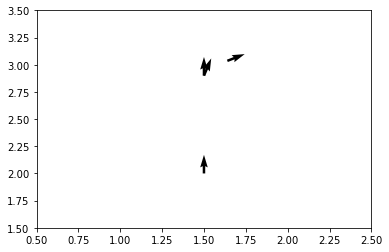

In [38]:
"""
b) After reaching position x = 1.5m, y = 2.0m, and θ = π/2 the robot 
   executes the following sequence of steering commands (l = 0.5m) :
   
   (a) c1 = (vl = 0.3m/s,vr = 0.3m/s,t = 3s)
   (b) c2 = (vl = 0.1m/s,vr = −0.1m/s,t = 1s)
   (c) c3 = (vl = 0.2m/s,vr = 0m/s,t = 2s)
"""

x, y, theta = 1.5, 2.0, pi/2.0
l = 0.5

#plt.gca().set_aspect('equal')

# Initial position of the robot
plt.quiver(x, y, np.cos(theta), np.sin(theta))

# (a)
v_l = 0.3
v_r = 0.3
t = 3.0
x, y, theta = diffdrive(x, y, theta, v_l, v_r, t, l)
plt.quiver(x, y, np.cos(theta), np.sin(theta))
print(x, y, theta)

# (b)
v_l = 0.1
v_r = -0.1
t = 1
x, y, theta = diffdrive(x, y, theta, v_l, v_r, t, l)
plt.quiver(x, y, np.cos(theta), np.sin(theta))
print(x, y, theta)

# (c)
v_l = 0.2
v_r = 0.0
t = 2
x, y, theta = diffdrive(x, y, theta, v_l, v_r, t, l)
plt.quiver(x, y, np.cos(theta), np.sin(theta))
print(x, y, theta)

plt.xlim(0.5, 2.5)
plt.ylim(1.5, 3.5)

plt.show()